### Questions

This project is aimed to uncover some insights from the Airbnb Open Data, The following questions would be answered from the data.
1. What are the different property types in the Dataset?
2. Which neighborhood group has the highest number of listings?
3. Which neighborhoods group have the highest average prices for Airbnb listings?
4. Is there a relationship between the construction year of property and price?
5. Who are the top 10 hosts by calculated host listing count?
6. Are hosts with verified identities more likely to receive positive reviews?
7. Is there a correlation between the price of a listing and its service fee?
8. What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
9. Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

Import Libraries

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sna

In [115]:
df = pd.read_excel("Airbnb.xlsx")

In [116]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [118]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [119]:
df.drop_duplicates(inplace= True)

df.drop(["house_rules", "license"], axis = 1, inplace= True)

In [120]:
df["price"] = df["price"].astype(str).str.replace("$", "", regex=False)
df["price"] = df["price"].astype(str).str.replace(",", "", regex=False)
df["service fee"] = df["price"].astype(str).str.replace("$", "", regex=False)
df["service fee"] = df["price"].astype(str).str.replace(",", "", regex=False)

In [121]:
df.rename(columns = {
    "price" : "price_$",
    "service fee" : "service_fee_$"
}, inplace = True)

In [122]:
df.dropna(inplace = True)

In [123]:
df["price_$"] = df["price_$"].astype(float)
df["service_fee_$"] = df["service_fee_$"].astype(float)
df["id"] = df["id"].astype(str)
df["host id"] = df["host id"].astype(str)
df["last review"] = pd.to_datetime( df["last review"])
df["Construction year"] = df["Construction year"].astype(int)

In [124]:
df.loc[df["neighbourhood group"] == "brookln", "neighbourhood group"] = "Brooklyn"
df = df.drop(df[df["availability 365"]> 500]. index)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83796 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83796 non-null  object        
 1   NAME                            83796 non-null  object        
 2   host id                         83796 non-null  object        
 3   host_identity_verified          83796 non-null  object        
 4   host name                       83796 non-null  object        
 5   neighbourhood group             83796 non-null  object        
 6   neighbourhood                   83796 non-null  object        
 7   lat                             83796 non-null  float64       
 8   long                            83796 non-null  float64       
 9   country                         83796 non-null  object        
 10  country code                    83796 non-null  object        
 11  instan

In [126]:
df.duplicated().value_counts()

False    83796
Name: count, dtype: int64

# EDA

In [127]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83796.000000,83796.000000,83796.000000,83796.000000,83596.000000,83596.000000,83796.000000,83796.000000,83796,83796.000000,83796.000000,83796.000000,83796.000000
mean,40.727353,-73.948502,0.497721,2012.489522,626.342457,626.342457,7.436775,32.226622,2019-06-09 15:15:53.229271296,1.375596,3.278820,7.049907,141.759153
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,50.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687660,-73.982110,0.000000,2007.000000,340.000000,340.000000,2.000000,3.000000,2018-10-27 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721335,-73.953710,0.000000,2012.000000,625.000000,625.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762580,-73.930790,1.000000,2017.000000,914.000000,914.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,1200.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056317,0.050338,0.499998,5.760523,331.809388,331.809388,28.122911,51.897899,NaN,1.749446,1.283724,29.568700,133.408285


In [128]:
property_types = df["room type"].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44367
Private room,37664
Shared room,1655
Hotel room,110


<BarContainer object of 4 artists>

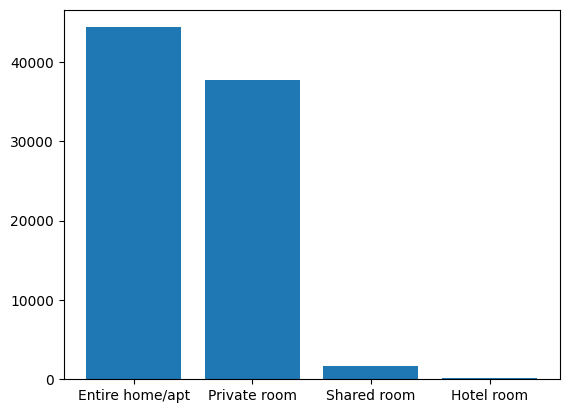

In [129]:
plt.bar(property_types.index, property_types.loc[:, "count"])

In [130]:
hood_group = df["neighbourhood group"].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34780
Manhattan,34735
Queens,11184
Bronx,2276
Staten Island,821


<BarContainer object of 5 artists>

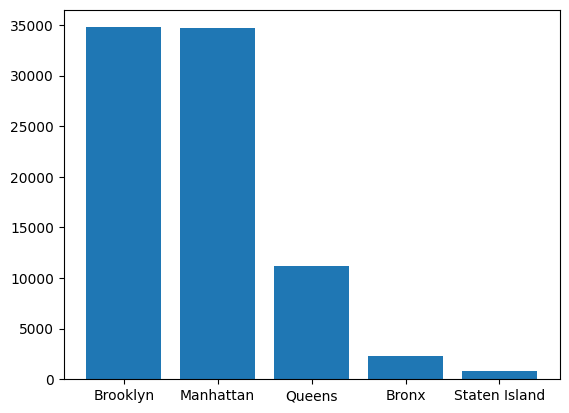

In [131]:
plt.bar(hood_group.index, hood_group.loc[:, "count"])

In [132]:
avg_price = df.groupby("neighbourhood group")["price_$"].mean().sort_values(ascending = False).to_frame()
avg_price

,price_$
neighbourhood group,
Queens,630.535365
Bronx,630.343901
Brooklyn,627.717002
Manhattan,623.446847
Staten Island,622.372861


<BarContainer object of 5 artists>

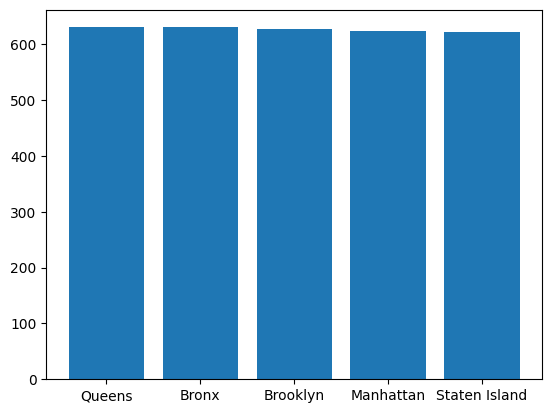

In [133]:
plt.bar(avg_price.index, avg_price.loc[:, "price_$"])

<Axes: xlabel='Construction year'>

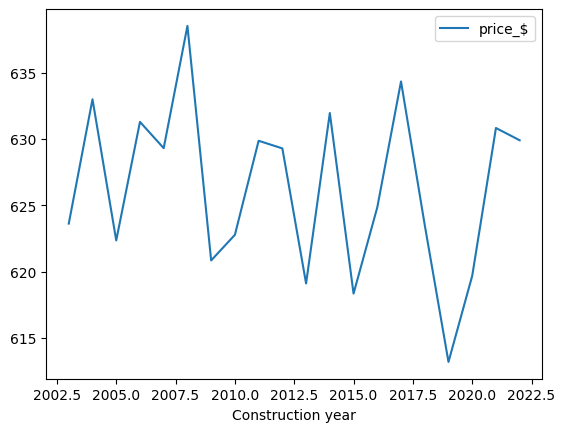

In [134]:
construc = df.groupby(df["Construction year"])["price_$"].mean().to_frame()
construc.plot()

<Axes: xlabel='host name'>

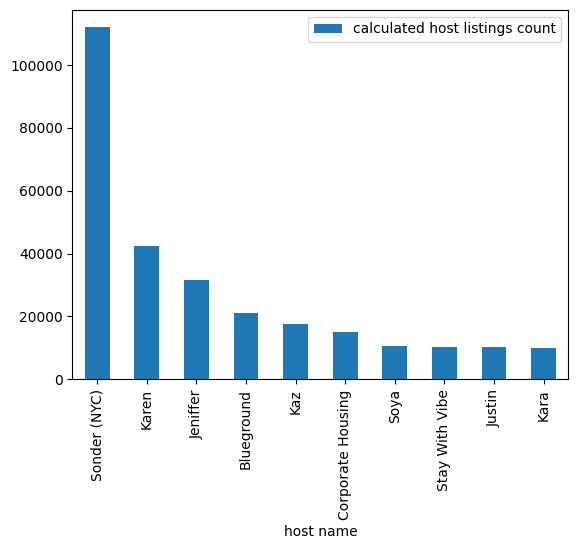

In [139]:
df.groupby("host name")["calculated host listings count"].sum().sort_values(ascending = False ).nlargest(10).to_frame().plot.bar()